In [4]:
Threads.nthreads()

8

In [5]:
push!(LOAD_PATH, "/home/aaron/projects/Ising/src/Julia");

In [6]:
using SpinBodies, WalterMethod
using PyPlot

In [4]:
n = 2^1
T = 2.0;

In [16]:
lattice = SpinLattice(n, T)
ps = vec([lattice.f(-2b.E, T) for b in lattice.bs])
tree = WalterTree(ps)
fig, ax = PyPlot.subplots()
for i = 1:1e5
    walter_step!(lattice, tree)
    if i % 100 == 0
        ax.cla()
        ax.matshow(visualize(lattice))
        display(fig)
        PyPlot.pause(0.01)
        IJulia.clear_output(true)
    end
end

LoadError: BoundsError: attempt to access 2×2 Array{SpinBody,2} at index [2, 6]

In [32]:
T = 1.0
threads = Threads.nthreads()
pstart = 2
steps = 1e5
data = Vector{Float64}(undef, threads-1);

In [33]:
for p in pstart:pstart+threads-2
    n = 2^p
    lattice = SpinLattice(n, T)
    ps = vec([lattice.f(-2b.E, T) for b in lattice.bs])
    tree = WalterTree(ps)
    time = @elapsed for _ in 1:steps
        walter_step!(lattice, tree)
    end
    data[p-pstart+1] = time / steps
end

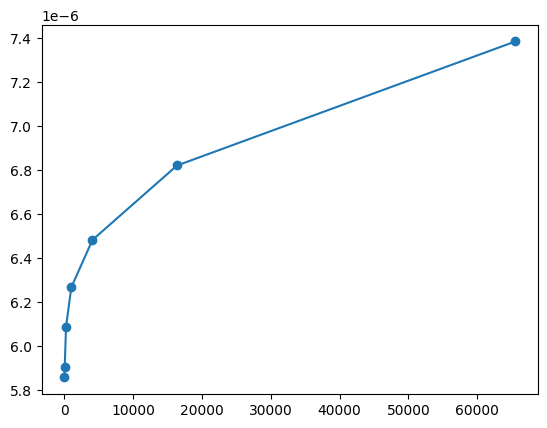

In [49]:
fig, ax = PyPlot.subplots()
ns = [(2^p)^2 for p in pstart:pstart+threads-2]
ax.plot(ns, data)
ax.scatter(ns, data)
savefig("scaling")

In [48]:
PyPlot.savefig(fig, "scaling.pdf")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/aaron/.julia/packages/PyCall/l64G5/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError('savefig() takes 2 positional arguments but 3 were given')
  File "/home/aaron/.local/lib/python3.8/site-packages/matplotlib/pyplot.py", line 723, in savefig
    res = fig.savefig(*args, **kwargs)
